<a href="https://colab.research.google.com/github/nevasini/Breast-Cancer-Detection/blob/main/trial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! unzip -d dataset "/content/drive/MyDrive/split-data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/split-data/train/zero/10255_idx5_x651_y851_class0.png  
  inflating: dataset/__MACOSX/split-data/train/zero/._10255_idx5_x651_y851_class0.png  
  inflating: dataset/split-data/train/zero/12749_idx5_x1451_y451_class0.png  
  inflating: dataset/__MACOSX/split-data/train/zero/._12749_idx5_x1451_y451_class0.png  
  inflating: dataset/split-data/train/zero/9266_idx5_x1901_y451_class0.png  
  inflating: dataset/__MACOSX/split-data/train/zero/._9266_idx5_x1901_y451_class0.png  
  inflating: dataset/split-data/train/zero/15902_idx5_x251_y2101_class0.png  
  inflating: dataset/__MACOSX/split-data/train/zero/._15902_idx5_x251_y2101_class0.png  
  inflating: dataset/split-data/train/zero/8867_idx5_x2501_y1051_class0.png  
  inflating: dataset/__MACOSX/split-data/train/zero/._8867_idx5_x2501_y1051_class0.png  
  inflating: dataset/split-data/train/zero/12890_idx5_x1851_y801_class0.png  
  inflating: dataset/__MACOSX/split-data

In [266]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, Adadelta
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2, l1_l2

In [258]:
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rescale=1/255)    

train_dataset = image_generator.flow_from_directory(
                                                 directory="/content/dataset/split-data/train",
                                                 shuffle=True,
                                                 target_size=(128,128), 
                                                 color_mode = 'rgb',
                                                 subset="training",
                                                 class_mode='categorical')

Found 194266 images belonging to 2 classes.


In [259]:
test_dataset = image_generator.flow_from_directory(
                                                 directory="/content/dataset/split-data/test",
                                                 shuffle=False,
                                                 target_size=(128,128), 
                                                 color_mode = 'rgb',                                                
                                                 class_mode='categorical')

Found 41629 images belonging to 2 classes.


In [260]:
validation_dataset = image_generator.flow_from_directory(
                                                 directory="/content/dataset/split-data/valid",
                                                 shuffle=False,
                                                 target_size=(128,128), 
                                              
                                                 class_mode='categorical')

Found 41629 images belonging to 2 classes.


In [267]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3),  activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (5,5),  activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu', kernel_regularizer=l2(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.0001)))
model.add(Dense(2, activation='softmax'))

In [268]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 58, 58, 128)       204928    
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 56, 56, 256)       295168    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 28, 28, 256)       0         
_________________________________________________________________
global_average_pooling2d_15  (None, 256)             

In [271]:
opt = Adam(lr = 1e-05)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [281]:
history=model.fit(train_dataset, validation_data = validation_dataset,batch_size = 128, shuffle = True,  epochs = 5)

Epoch 1/5
6071/6071 [==============================] - 926s 152ms/step - loss: 0.6060 - accuracy: 0.7159 - val_loss: 0.6006 - val_accuracy: 0.7161
Epoch 2/5
6071/6071 [==============================] - 925s 152ms/step - loss: 0.6015 - accuracy: 0.7161 - val_loss: 0.6017 - val_accuracy: 0.7161
Epoch 3/5
6071/6071 [==============================] - 923s 152ms/step - loss: 0.6014 - accuracy: 0.7161 - val_loss: 0.6014 - val_accuracy: 0.7161
Epoch 4/5
6071/6071 [==============================] - 920s 152ms/step - loss: 0.6013 - accuracy: 0.7161 - val_loss: 0.6008 - val_accuracy: 0.7161
Epoch 5/5
6071/6071 [==============================] - 928s 153ms/step - loss: 0.6012 - accuracy: 0.7161 - val_loss: 0.6006 - val_accuracy: 0.7161


In [282]:
model.evaluate(test_dataset)

1301/1301 [==============================] - 60s 46ms/step - loss: 0.6006 - accuracy: 0.7161


[0.600598156452179, 0.7161113619804382]

In [283]:
import matplotlib.pyplot as plt

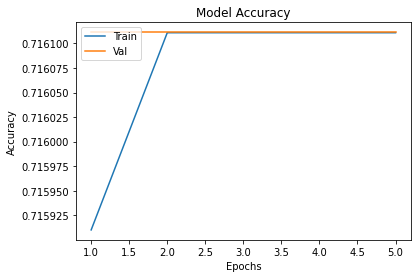

In [284]:
epoch_range=range(1,6)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Val'],loc="upper left")
plt.show()

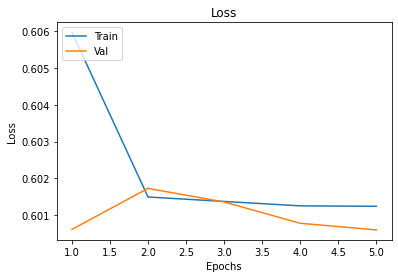

In [285]:
epoch_range=range(1,6)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Val'],loc="upper left")
plt.show()

In [288]:
model.save("final_trial_1.h5")